# Ejercicio 5
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos
1. Nombre del animal
2. Tiene Pelo
3. Plumas
4. Huevos
5. Leche
6. Vuela
7. Acuático
8. Depredador
9. Dentado
10. Vertebrado
11. Branquias
12. Venenoso
13. Aletas
14. Patas
15. Cola
16. Domestico
17. Tamaño gato
18. Clase


Salvo los atributos 1 y 18 que contienen texto y el 14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 18):
mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases. Utilice el 70% de los ejemplos para  ntrenar y el 30% para realizar el testeo. Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la performance del modelo.
Fuente de Datos: Zoo Data Set - https://archive.ics.uci.edu/ml/datasets/zoo

In [20]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [21]:
def open_file(path, delimiter=','):
    # Detectar la codificación del archivo
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']
    
    # Leer el archivo CSV usando el delimitador correcto
    df = pd.read_csv(path, encoding=encoding, delimiter=delimiter)
    
    return df

df = open_file("../Datos/zoo.csv")
# df

In [65]:
Y_raw = np.array(df.iloc[:,0:1])
Y_raw = [e[0] for e in Y_raw]
X_raw = np.array(df.select_dtypes(include=np.number))
X_raw

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [66]:
binarizer = preprocessing.LabelBinarizer()
Y_raw = binarizer.fit_transform(Y_raw)
Y_raw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
scaler = preprocessing.StandardScaler()
X_raw  = scaler.fit_transform( X_raw )
X_raw

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [56]:
TEST_SIZE = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)

In [57]:
FunH = 'identity'   # identity logistic tanh relu
ocultas = (6)

alfa = 0.001
MAX_ITE = 1300

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=0.001,
                       verbose=False).fit(X_train, Y_train)

modelo.out_activation_ = 'softmax'


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

In [59]:
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

Efectividad:   1.43%
Score:   0.00%


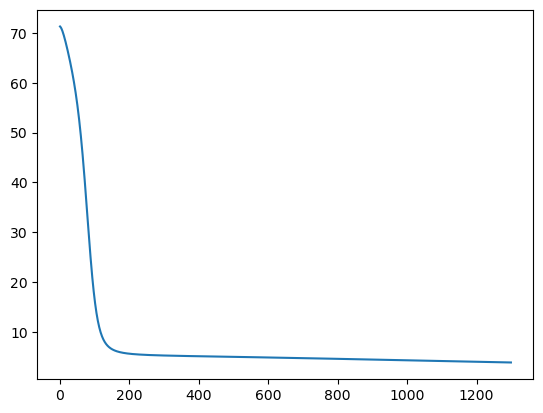

In [60]:
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('Score: %6.2f%%' % (score) )

plt.plot(modelo.loss_curve_)

In [61]:
#  ########### Medición del testeo ######################
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )

Efectividad:   0.00%
      Score:   0.00%
